#KMEANS

Kmeans is a simple clustering algorithm. In this case we are in an unsupervised setup, meaning that we don't have classes or output labels for our data, but we want to cluster in a way that data belonging to a cluster are similar to each other, and different from data belonging to other clusters.

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.cluster  import KMeans

from IPython.display  import Image as display_image
from scipy.spatial.distance import cdist

%matplotlib inline  


Read an image using Scipy library. The imread() function returns a matrix. Use the shape attribute to see the size of the image.

You can have a look at it using the display IPython library.

(314L, 500L, 4L)


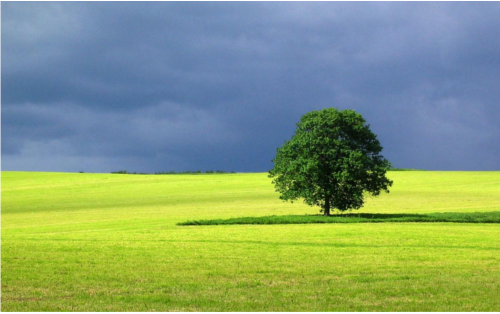

In [2]:
# Read an image from a file as an array
img = sp.misc.imread('C:/Users/gazza/ipython_notebooks/ASI (ipython notebooks)/Fellowship/K_Means_Data/Landscape_small.png')
print img.shape
display_image(filename='C:/Users/gazza/ipython_notebooks/ASI (ipython notebooks)/Fellowship/K_Means_Data/Landscape_small.png')

The image consists of 314 x 500 pixels so is now stored in a 314x500 array where each entry denotes the colour of the pixel. The colour of the pixel consists of 4 pieces of information, a value for each of the three primary (rgb) colours as well as an alpha or opacity value. First, we remove this alpha value. Subsequently, we "flatten" the array i.e. make it 1 dimensional

In [14]:
#remove alpha channel
img = img[:, :, :3]

# flatten the image, from a 2D matrix of colours, to a 1D vector of colours
img_flat = sp.reshape(img, (img.shape[0]*img.shape[1],3)).astype(float)

print(img_flat.shape)

(157000L, 3L)


Let's try the algorithm with 10 predefined clusters. The reason we "flattened" the imagine to make it 1 dimensional, is that in general, sci-kit learn methods will take an NxM array as their argument, in which N is the number of data points and M the number of features. Thus an axbxM feature input would confuse it. After performing the K means procedure however, we will need to "unflatten" the fitted array in order to view it so keep that in mind.

In [110]:
clf = KMeans(n_clusters = 10, init='k-means++')
#the fit method in sci-kit learn libraries tends to be the one that takes an NxM array as its input
clf.fit(img_flat.astype(float))

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [31]:
#Now that we have calculated where the centroids of the 10 clusters are, we loop over all data points and give them the index
#of the cluster they are closest too
indices= clf.predict(img_flat)


##Reshape and display the new image
The pyplot imshow function takes an MxN array and plots an imagine which is MxN pixels. Each pixel value is a single number. If you want to play around with this, try for example running the code:

plt.imshow([[1,1,2,2,3],[1,1,1,2,3],[1,1,2,2,3],[1,2,2,3,3],[2,2,3,3,3],[3,3,3,3,3]])

plt.show()

Using this, we can re print our original image. To do this, we will have to take the 1d array called indices and "reshape" it using scipy's reshape. To see how this works, try reshaping the array [1,2,3,4,5,6] using sp.reshape( [1,2,3,4,5,6],(2,3)) and similarly sp.reshape( [1,2,3,4,5,6],(3,2))

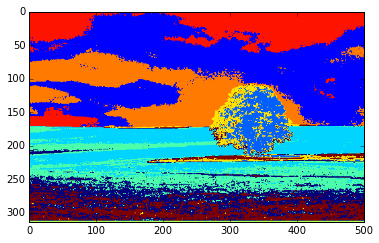

In [33]:
plt.imshow(sp.reshape(indices, (img.shape[0], img.shape[1])))
plt.show()

##Elbow Curves and Choosing K
How can we choose K?

Ideally, we want to have the smallest number of clusters that is able to separate our data in groups that are "distinct enough".

Thus let us try all K=1-10, calculate the positions of all of the centroids, and then take the average of the Euclidean distance from every point to its closest centroid and plot this Vs K

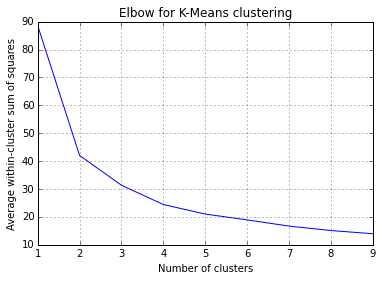

In [97]:
K = range(1,10)

#Note here we are using a different library. Previously it was sci-kit learn, no we've moved to scipy (see the top of the notebook
#where we imported KMeans and kmeans)

KM = [kmeans(img_flat,k) for k in K] # apply kmeans 1 to 10

#the scipy method stores the result in a funny format, it stores the coordinates of all centroids and then the measure of
#average distance of all points from their closest centroid (which is what we're after)


#print out the first few entries to visualise this
print KM[:3]

#you should see that each entry contains a list of coordinates (the cluster centroids) followed by a single number, which is the
#number we're after
distances=[KM[i][1] for i in range(len(KM))]

plt.plot(range(1,10),distances)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering') 


For a slightly less "black box" way of doing this, we can run a loop over all desired values of K, fitting the model (using sci-kit learn this time) for each K seperately. We then calculate the "indices" for each pixel (i.e. which cluster it belongs to or which centroid it is closest to). Then we compute the Euclidean distance from each point to its closest centroid and take the average. 


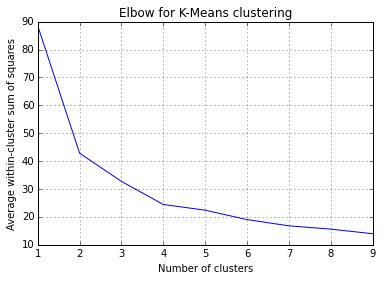

In [104]:
centroids=[[] for i in range(1,10)]
euclidean_distances=[0 for i in range(len(img_flat))]
cluster_averaged_distances=[0 for i in range(1,10)]

for K in range(1,10):
    clf = KMeans(n_clusters = K, init='k-means++')
    clf.fit(img_flat.astype(float))
    indices= clf.predict(img_flat)
    
    centroids= clf.cluster_centers_ 
    
    for j in range(len(img_flat)):
        euclidean_distances[j]=0
        cluster=indices[j]
        for k in range(3):
            euclidean_distances[j]+=(img_flat[j][k]-centroids[cluster][k])**2
        euclidean_distances[j]=(euclidean_distances[j])**0.5

    cluster_averaged_distances[K-1]=np.mean(euclidean_distances)
               
plt.plot(range(1,10),cluster_averaged_distances)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  
    
    

The above is substantially slower than using sci-py because running all of these loops isn't well optimised. Sci-kit learn has a similar method for calculating the "Sum of distances of samples to their closest cluster center" called "intertia" (see http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), but it calculates the sum of the squared Euclidean distances, rather than the sum of the roots, meaning the answer is somewhat different than that obtained using scipy (if we take the square root at the end, it brings us to the same ballpark but $\Sigma_{i}\sqrt{x_{i}}\neq \sqrt{\Sigma_{i}x_{i}}$). Nonetheless, this is a completely valid metric, it's up to you which you'd prefer to use.

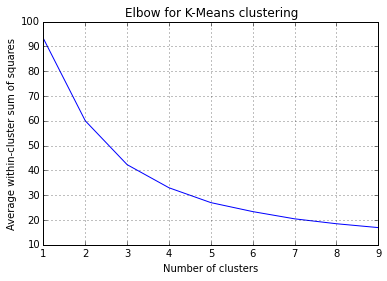

In [111]:
squared_distances=[]
for k in range(1,10):
    clf = KMeans(n_clusters = k, init='k-means++')
    clf.fit(img_flat.astype(float))
    squared_distances.append((clf.inertia_/len(img_flat))**0.5)
    
plt.plot(range(1,10),squared_distances)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  
    

##How many clusters to use?
What is the outcome if we choose 3 or 4 clusters? Play around in the cell below changing the number of clusters and printing the resultant images


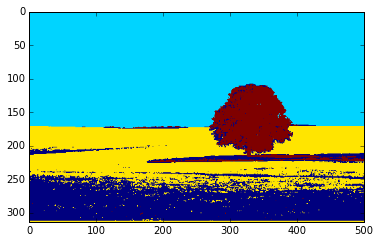

In [39]:
clf = KMeans(4, init='k-means++')
clf.fit(img_flat)
indices= clf.predict(img_flat)


plt.imshow(sp.reshape(indices, (img.shape[0], img.shape[1])))
plt.show()


**Exercise:**<br>
Now you can repeat the procedure with the image 'ASI-Machine-Learning.png'